# Session 2: Introduction to pycall.rb

## Getting started to pycall.rb

To load pycall, just do `require 'pycal

In [1]:
require 'pycall'

true

Python environment isn't initialized by doing `require 'pycall'`.  It's deferred at the first time to use the feature of Python interpreter.  If you want to controll the timing at which Python intepreter is initialized, call `PyCall.init` method explicitly.

### Specifying what Python is used

pycall.rb uses `python` command to determine the location of `libpython` shared library.  There are three ways to change what Python is used in pycall.rb.

1. Specify the location of libpython shared library in the environment variable `LIBPYTHON`.
2. Specify the location of python command in the argument of `PyCall.init` method.
3. Specify the location of python command in the environment variable `PYTHON`.

The environment variable `LIBPYTHON` has highest priority. If you specify the argument of `PyCall.init`, the environment variable `PYTHON` is not used.

### Importing Python module into Ruby environment

You can import Python's libraries as modules into Ruby environment by `PyCall.import_module` method.  This method loads the Python module specified by the argument, wraps it by anonymous Ruby module object, and returns it.  Let's try importing Python's `math` module.

In [2]:
pymath = PyCall.import_module('math')

<module 'math' from '/usr/local/lib/python3.6/lib-dynload/math.cpython-36m-x86_64-linux-gnu.so'>

Here the variable `pymath` indicates a warpper object of Python's math module.

### Accessing object attributes

You can access the attributes of Python objects by the form of method call: `obj.<name of attribute>`.  For example, Python's `math.pi` can be referred as `pymath.pi` here:

In [3]:
pymath.pi

3.141592653589793

### Implicit type conversion from Python to Ruby

By the way, what type is the value of `pymath.pi`?

In [4]:
pymath.pi.class

Float

It's an instance of Ruby's `Float` class while `math.pi` in Python is an instance of Python's `float` type.  It's because pycall.rb performs implicit type conversion from Python to Ruby.  There are the following patterns of implicit type conversions.

| Python type | Ruby class | Note |
| --- | --- | --- |
| bool | TrueClass / False Class | |
| int | Integer | |
| long | Integer | available only Python 2.7 |
| float | Float | |
| complex | Complex | |
| bytes | String | same as `str` in Python 2.7 |
| str | String |
| unicode | String | available only Python 2.7 |

For the following Python types, pycall.rb generates wrapper objects instead of conversion.

| Python type | Ruby class |
| --- | --- | --- |
| type | Class |
| module | Module |
| list | PyCall::List |
| tuple | PyCall::Tuple |
| dict | PyCall::Dict |
| slice | PyCall::Slice |
| set | PyCall::Set |

### Passing Ruby objects to Python functions

You can pass Ruby objects to Python functions.  Let's check it by `math.sin`.

In [5]:
pymath.sin(30 * Math::PI / 180)

0.49999999999999994

This result should be same as `Math.sin` in Ruby:

In [6]:
Math.sin(30 * Math::PI / 180)

0.49999999999999994

Good.

### Implicit type conversion from Ruby to Python

When passing Ruby objects to Python functions, the Ruby objects are implicitly converted to Python objects.  The followin table shows the default type mappings.

| from Ruby | to Python | Note |
| --- | --- | --- |
| NilClass | NoneType | |
| TrueClass | bool | |
| FalseClass | bool | |
| Integer | int / long | depends on the amount of value |
| Float | float | |
| Rational | fractions.Fraction | |
| Complex | complex | |
| String | str / unicode / bytes | the result type is depends on the encoding |
| Symbol | str / unicode / bytes | the result type is depends on the encoding |
| Array | list | |
| Hash | dict | |
| PyCall::PyObjectWrapper | object | use the wrapped object as is |

### Evaluating Python expressions and executing Python statements

There are two ways to embed Python code in Ruby code.  Using `PyCall.eval` method can be used for evaluating Python **expression**.  And, using `PyCall.exec` method can be used for executing Python **statements**.

The following elements are expressions in Python.

- Literals
- Variable references
- Arithmetic operations
- Function calls

On the other hand, the following elements are statements in Python.

- Function definitions
- Class definitions

Functions and classes defined by `PyCall.exec` are put into the `__main__` module.

For the details of the difference between expressions and statements in Python, see the reference manual:

- https://docs.python.jp/3/reference/expressions.html
- https://docs.python.jp/3/reference/simple_stmts.html

### Defining the original wrapper classes and registering type conversion for them

You can define your original wrapper classes for Python types, and register type conversions from their types to your wrapper classes.

Defining a wrapper class is just an assignment of a constant.  For example, the following code defines the wrapper class for `numpy.ndarray` type as `Numpy::NDArray` class.

```ruby
module Numpy
  NDArray = PyCall.import_module('numpy').ndarray
end
```

And, for registering type conversion, you just need to call `register_python_type_mapping` private class method of the wrapper class.

```ruby
module Numpy
  class NDArray
    register_python_type_mapping
  end   
end
```

### Importing the original Python code as a module

You can import entities in your original Python code as a Python module by `PyCall.import_module`.  You should specify your code locations in `PyCall.sys.path`.  For example, the following code imports `foo.py` as `foo` module when `foo.py` is in the same location of the Ruby script.

```ruby
PyCall.sys.path.append(File.dirname(__FILE__))
foo = PyCall.import_module('foo')
```

----

## Data analysis by using Python data tools through pycall.rb

Using pycall.rb, you can use Python data tools such as pandas and matplotlib for data analysis in Ruby.  In this part, let's look into how to use pycall.rb for data analysis by Python data tools.

### Downloading data

In this part, we use Iris data set provided by UCI Machine Learning Repository.  To download this data set, execute the following code.

In [7]:
unless File.exist?('iris.data')
  system("curl -sfSLO https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
end

### Loading data as a data frame

To load the data set as a pandas data frame, first you should load `pandas` wrapper gem library, and use `Pandas.read_csv` method.  This method is corresponding to `pandas.read_csv` in Python.

In [8]:
require 'pandas'

true

In [9]:
iris = Pandas.read_csv('iris.data', names: %w[SepalLength SepalWidth PetalLength PetalWidth Species])
nil

To check the first and the last some lines in the data, you can use `head` and `tail` methods, respectively.

In [10]:
iris.head

SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [11]:
iris.tail

SepalLength  SepalWidth  PetalLength  PetalWidth         Species
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

And, you can use `describe` method of the data frame to check statistical summary, including both descriptive and order statistics.

In [12]:
iris.describe

SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000

And you can check statistical summary for each value of `Species` column by using `groupby` method.

In [13]:
# The last `.T` means transpose the dataframe.
# The reason why transpose the result is just the readability of the result.
iris.groupby('Species').describe.T

Species            Iris-setosa  Iris-versicolor  Iris-virginica
PetalLength count    50.000000        50.000000       50.000000
            mean      1.464000         4.260000        5.552000
            std       0.173511         0.469911        0.551895
            min       1.000000         3.000000        4.500000
            25%       1.400000         4.000000        5.100000
            50%       1.500000         4.350000        5.550000
            75%       1.575000         4.600000        5.875000
            max       1.900000         5.100000        6.900000
PetalWidth  count    50.000000        50.000000       50.000000
            mean      0.244000         1.326000        2.026000
            std       0.107210         0.197753        0.274650
            min       0.100000         1.000000        1.400000
            25%       0.200000         1.200000        1.800000
            50%       0.200000         1.300000        2.000000
            75%       0.300000         1.500000        2.300000
            max       0.600000         1.800000        2.500000
SepalLength count    50.000000        50.000000       50.000000
            mean      5.006000         5.936000        6.588000
            std       0.352490         0.516171        0.635880
            min       4.300000         4.900000        4.900000
            25%       4.800000         5.600000        6.225000
            50%       5.000000         5.900000        6.500000
            75%       5.200000         6.300000        6.900000
            max       5.800000         7.000000        7.900000
SepalWidth  count    50.000000        50.000000       50.000000
            mean      3.418000         2.770000        2.974000
            std       0.381024         0.313798        0.322497
            min       2.300000         2.000000        2.200000
            25%       3.125000         2.525000        2.800000
            50%       3.400000         2.800000        3.000000
            75%       3.675000         3.000000        3.175000
            max       4.400000         3.400000        3.800000

### Visualizing the raw data

Visualizing the raw data must be done to see the characteristics of whole data before processing the data.  Here we check the fields correlations by pairplot (a.k.a. scatterplot matrix).

For drawing pairplot, we use Python's seaborn library through pycall.rb.  seaborn uses matplotlib for drawing charts, so we should activate IRuby integration for matplotlib before calling seaborn.  To activate IRuby integration for matplotlib, execute the following code.

In [14]:
require 'matplotlib/iruby'
Matplotlib::IRuby.activate
Matplotlib::Pyplot.ioff

The last line of the previous code cell disables interactive mode of matplotlib. It makes drawing faster.

Next, import seaborn module and put it in `sns` variable because seaborn's official abbrevation is sns.

In [15]:
sns = PyCall.import_module('seaborn')

<module 'seaborn' from '/usr/local/lib/python3.6/site-packages/seaborn/__init__.py'>

To draw a pairplot, you just need to call `sns.pairplot` method with a data frame to be visualized.

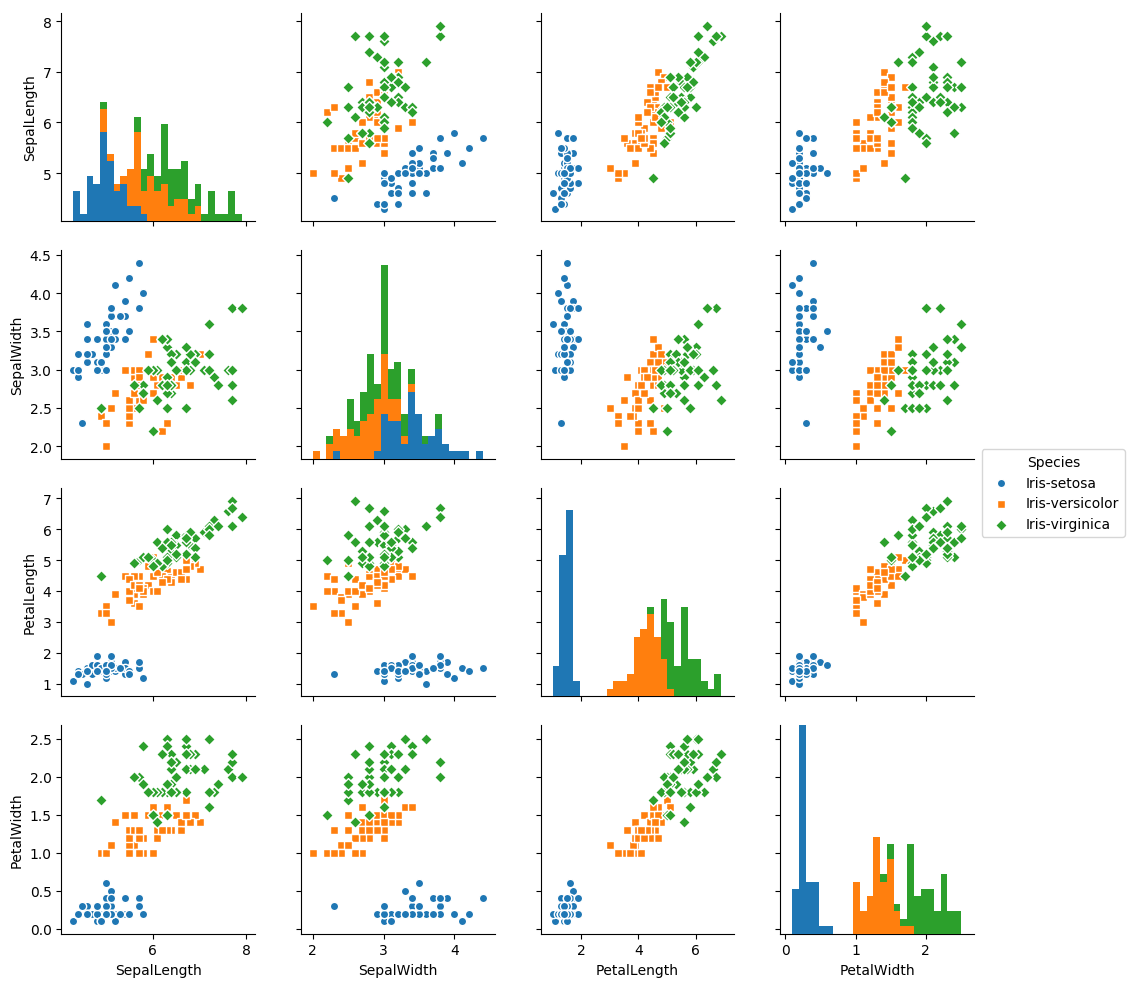

In [16]:
sns.pairplot(iris, hue: 'Species', markers: %w[o s D], diag_kws: {bins: 25})

See the documentation of sns.pairplot for more details:

- https://seaborn.pydata.org/generated/seaborn.pairplot.html

### Simple EDA

From the previous pairplot, you can find the following facts:

- There are a clear correlation between `PetalLength` and `PetalWidth`
- The samples of `Iris-setosa` is distinct from the other species
- The samples of `Iris-versicolor` and `Iris-virginica` aren't distinct but they can be classified with the small error rate.

So let's derive the new data from the existing fields to find the condition for separating species.

First, let's calculate the ratios of length and width of both speal and petal, and then visualize them by a pairplot.

In [17]:
iris['SepalRatio'] = iris['SepalLength'] / iris['SepalWidth']
iris['PetalRatio'] = iris['PetalLength'] / iris['PetalWidth']

iris[['SepalRatio', 'PetalRatio', 'Species']].groupby('Species').describe.T

Species           Iris-setosa  Iris-versicolor  Iris-virginica
PetalRatio count    50.000000        50.000000       50.000000
           mean      7.078000         3.242837        2.780662
           std       3.123779         0.312456        0.407367
           min       2.666667         2.666667        2.125000
           25%       4.687500         3.016667        2.511364
           50%       7.000000         3.240385        2.666667
           75%       7.875000         3.417582        3.055556
           max      15.000000         4.100000        4.000000
SepalRatio count    50.000000        50.000000       50.000000
           mean      1.474578         2.160402        2.230453
           std       0.118693         0.228658        0.246992
           min       1.268293         1.764706        1.823529
           25%       1.394608         2.033929        2.031771
           50%       1.467708         2.161290        2.169540
           75%       1.547654         2.232692        2.342949
           max       1.956522         2.818182        2.961538

Let's draw a new pairplot again with the new columns.

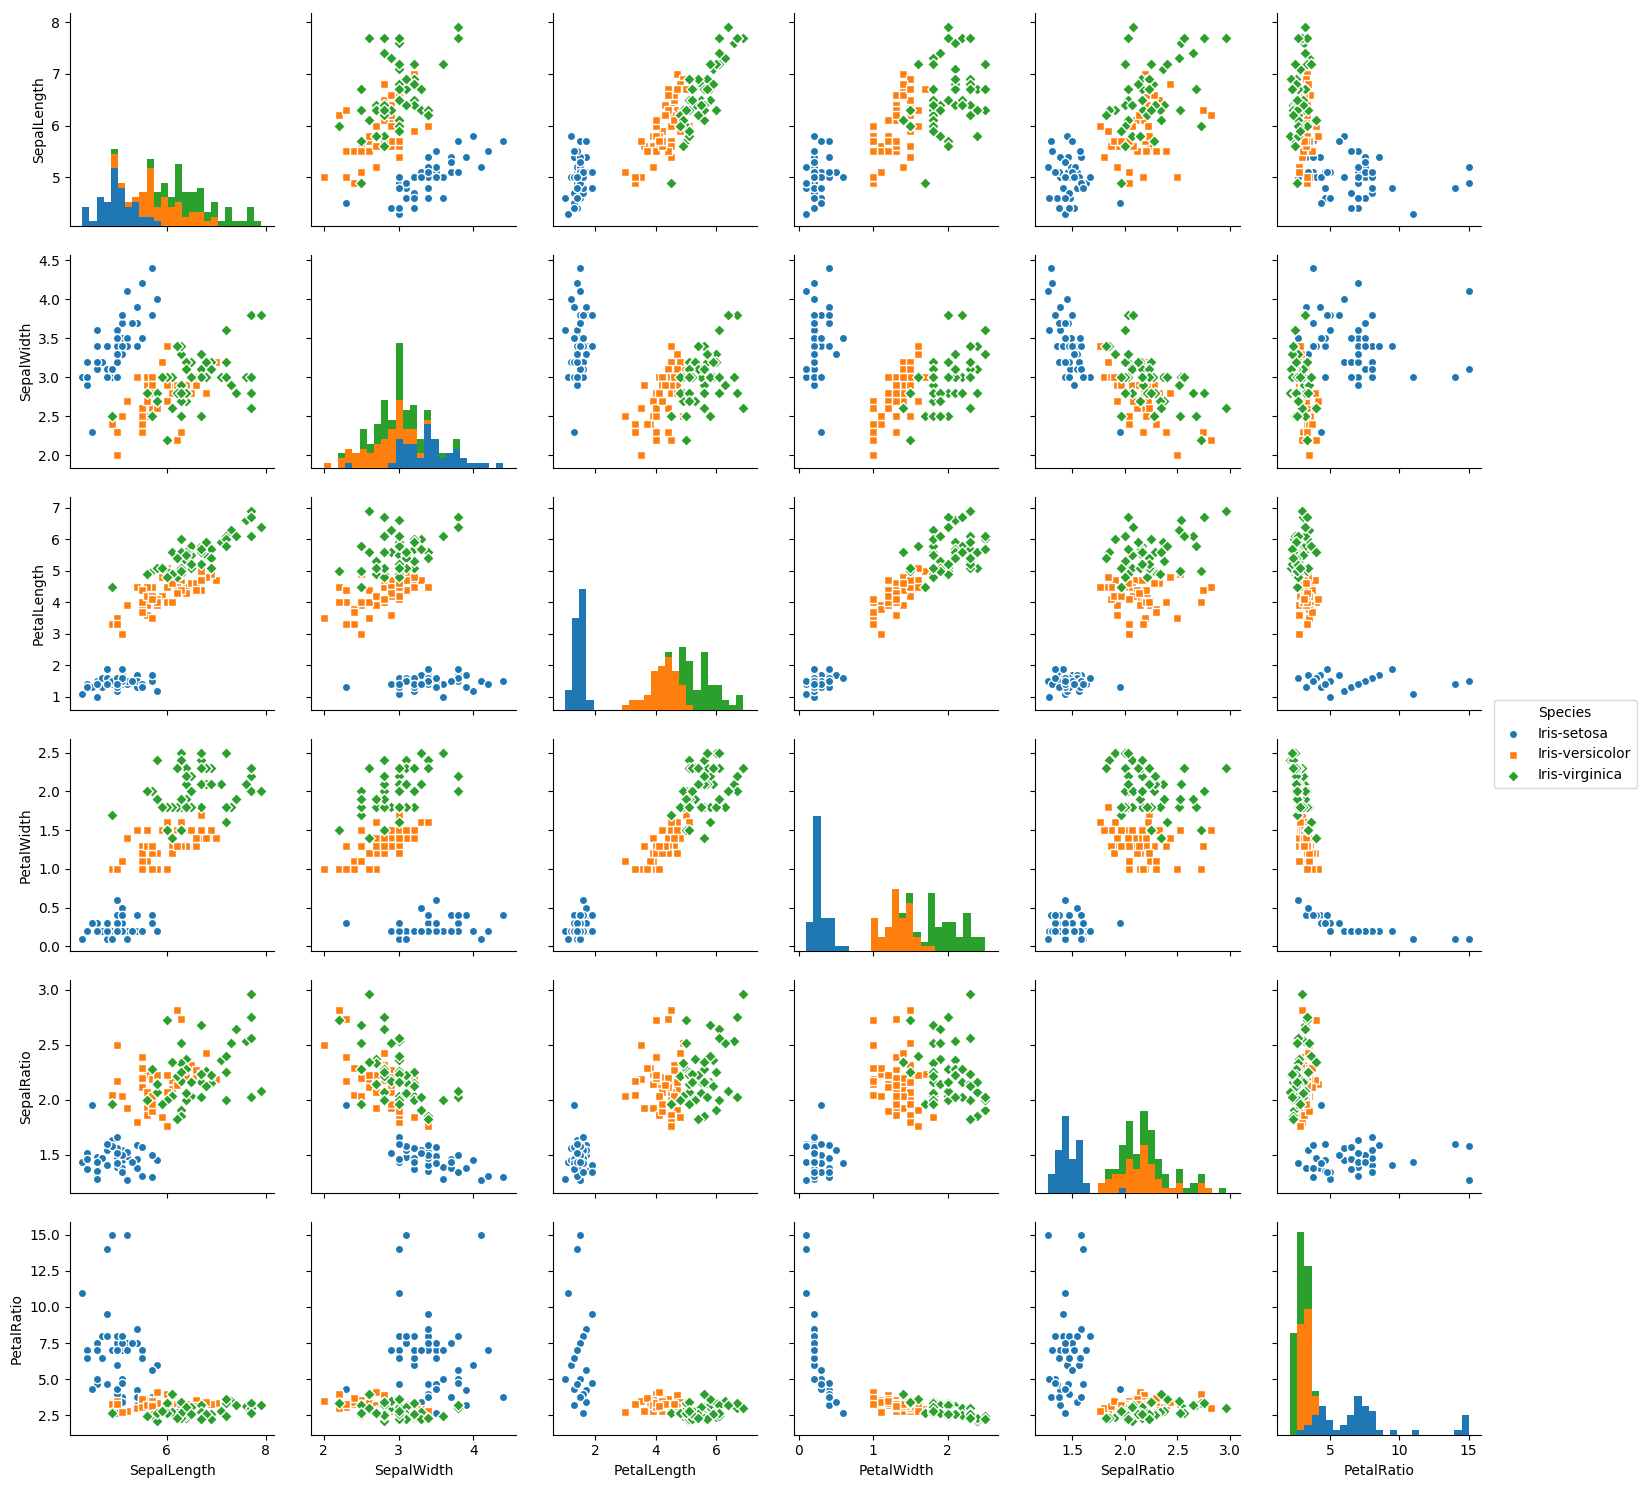

In [18]:
sns.pairplot(iris, hue: 'Species', markers: %w[o s D], diag_kws: {bins: 25})

Unfortunately, as you can see in this pairplot, two new fields seems not useful to classify species.
So let's move to the next exploration.

### Using PCA to extract principal components of the data

Next we want to try PCA to extract the components with higher power of expression of the data.
To compute PCA, we use scikit-learn's `sklearn.decomposition.PCA` class.

In [19]:
PCA = PyCall.import_module('sklearn.decomposition').PCA

<class 'sklearn.decomposition.pca.PCA'>

Using `fit_transform` instance method of this class, you can compute the principal components of the data.

In [20]:
pca = PCA.new
x_trans = pca.fit_transform(iris.iloc[0..-1, 0..3])
nil

Here, the variable `x_trans` has the principal component matrix of the data. The row direction is sample, and the column direction is feature.  The indices of features are ordered as highest expressive power comes first.

Make a new data frame `iris_trans` from `x_trans`, and show the pairplot of `iris_trans`.

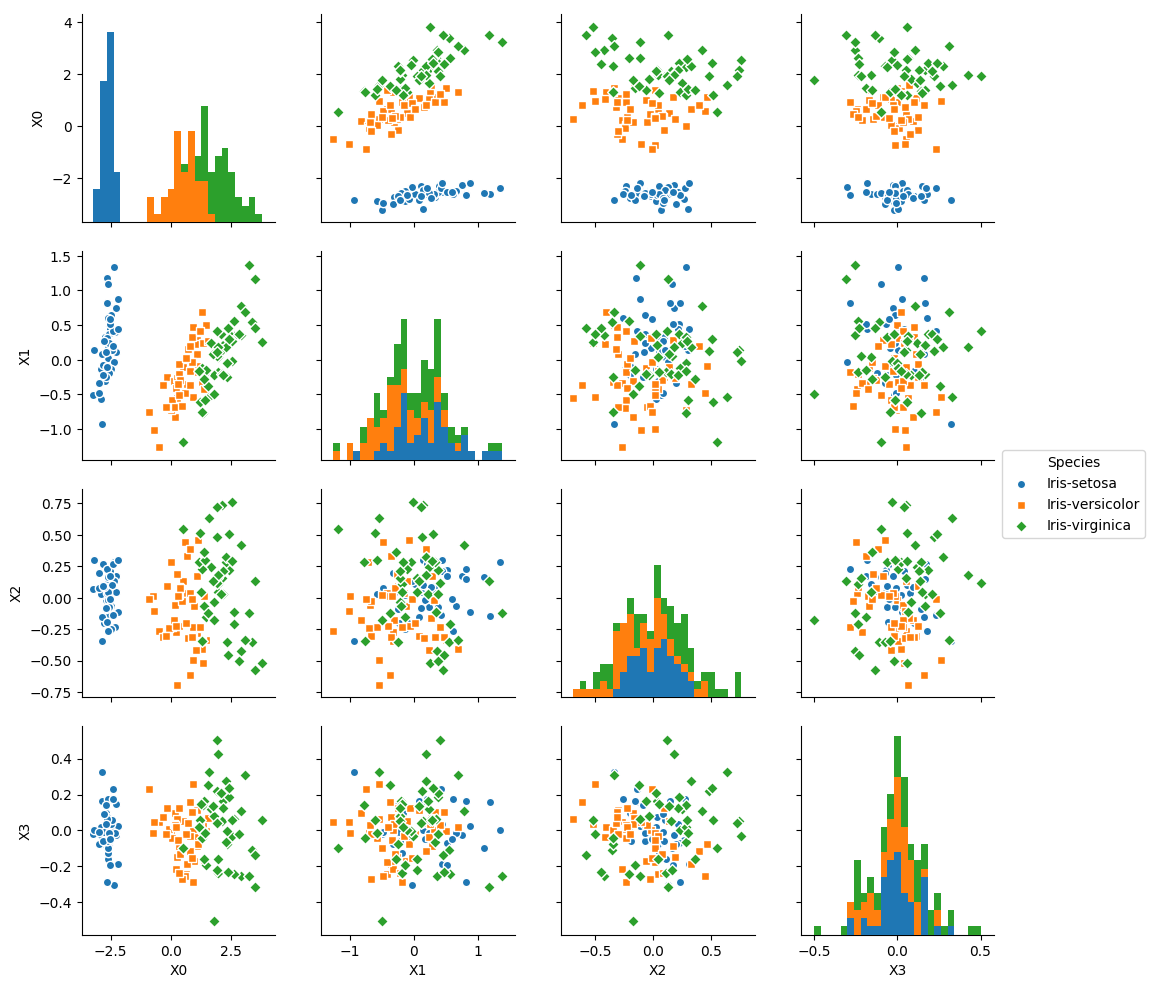

In [21]:
iris_trans = Pandas::DataFrame.new(data: x_trans, columns: %w[X0 X1 X2 X3])
iris_trans['Species'] = iris['Species']
sns.pairplot(iris_trans, hue: 'Species', markers: %w[o s D], diag_kws: {bins: 25})

From this pairplot, `Iris-versicolor` and `Iris-virginica` cannot be distinguished even by the principal components.

So let's give up exploration and move to make classifier for the values in the `Species` field.

### Making classifier by machine learning

To make classifier of `Species` field, we use Support Vector Machine algorithm.  scikit-learn provides a classifier model by Support Vector Machine as `sklearn.svm.SVC` class.

Before making classifier, split the processed data by PCA into two parts: for training and for validation.  For this separation, we can use `sklearn.model_selection.train_test_split` function.  The following code generates `x_train` and `y_train` for training the classifier model, and `x_val` and `y_val` for validating it.

In [22]:
ModelSelection = PyCall.import_module('sklearn.model_selection')
x_train, x_test, y_train, y_test = ModelSelection.train_test_split(
  x_trans, iris['Species'],
  test_size: 0.4,
  random_state: 13
)
nil

Then, creating the model that is an instance of `sklearn.svm.SVC`, call `fit` instance method to train the model, and call `score` method 

In [23]:
SVC = PyCall.import_module('sklearn.svm').SVC
model = SVC.new

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.98333333333333328

## Conclusion

In this notebook, we've learnt about pycall.rb and how to use it for data analysis.